## Project 2 Assignment - W200 Introduction to Data Science Programming, UC Berkeley MIDS

## File name: def_in_box_by_yards_allowed.ipynb
### Author: Victor Ramirez
### Team: TBD
#### Date created: 11/05/2021
#### Date last modified: 1/27/2021
#### Python Version: 3.8

### What is the optimal number of defenders in the box? 
- The defense needs to know which defender count will lead to the least yards allowed. 
- We analyzed the defender count which leads the least average yards allowed. 

1. Data Processing 
    - Loading nfl data from: https://www.kaggle.com/c/nfl-big-data-bowl-2021/overview
    - Combine data from games and plays
2. Results
    - Calculate the mean of yards per play
    - Group data by number of defenders in the box
3. Charts
    - Display the bar chart with optimal number of players in the box

In [17]:
'''
Load all the required import statements
Load the required data
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import join, dirname, abspath
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib.pyplot import figure



games = pd.read_csv('F:/code/uc berkeley/Project2_Brown_Eagle_Cabral_Lakka_Psaltos_Ramirez/nfl_pass_defense_eda/data/games.csv')
plays = pd.read_csv('F:/code/uc berkeley/Project2_Brown_Eagle_Cabral_Lakka_Psaltos_Ramirez/nfl_pass_defense_eda/data/plays.csv')

In [18]:
# merge data
df_plays_full = pd.merge(games,
                      plays,
                      how='outer',
                      on='gameId')

df_plays_full.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,playId,playDescription,quarter,down,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,09/06/2018,20:20:00,PHI,ATL,1,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,09/06/2018,20:20:00,PHI,ATL,1,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,09/06/2018,20:20:00,PHI,ATL,1,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,09/06/2018,20:20:00,PHI,ATL,1,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [19]:

# Question - Defenders in the box by Offensive Outcome of the Play by EPA
# Key features -  defendersInTheBox, offensePlayResult, playResult, epa

df_combined = pd.DataFrame(df_plays_full[['defendersInTheBox','offensePlayResult','playResult','epa']].copy())
df_combined = df_combined[(df_combined['defendersInTheBox'] >= 4) & (df_combined['defendersInTheBox'] <= 8)]

print(df_combined.head())
print(df_combined.tail())

   defendersInTheBox  offensePlayResult  playResult       epa
0                7.0                 10          10  0.261827
1                7.0                  0           0 -0.372360
2                6.0                  0           0 -0.702779
3                6.0                 33          33  3.047530
4                8.0                  0           0 -0.842272
       defendersInTheBox  offensePlayResult  playResult       epa
19234                4.0                  0           0 -0.460746
19235                6.0                  0           0 -2.743690
19236                6.0                 27         -10 -0.720168
19237                7.0                  0          15  1.336078
19238                6.0                  0           9  0.550256


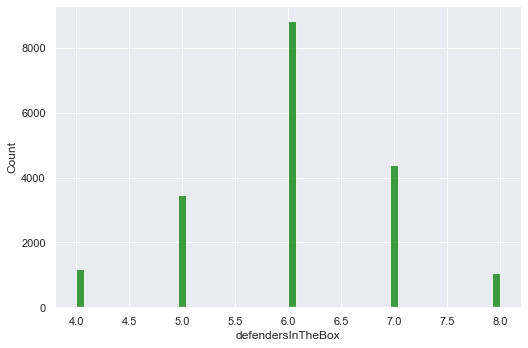

<Figure size 864x864 with 0 Axes>

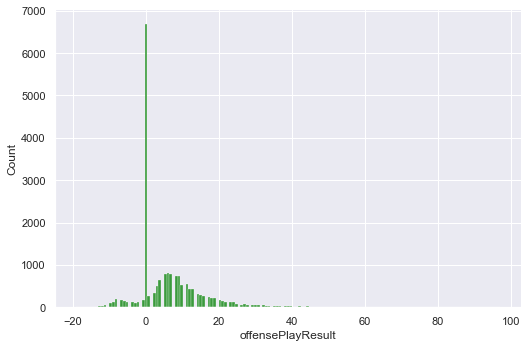

<Figure size 864x864 with 0 Axes>

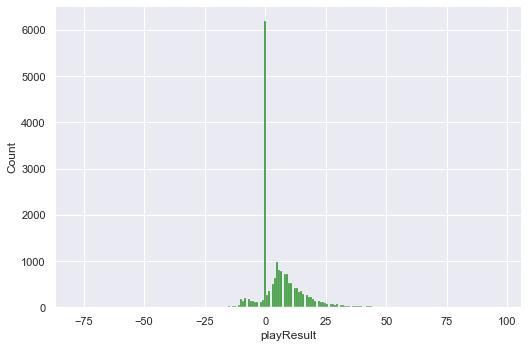

<Figure size 864x864 with 0 Axes>

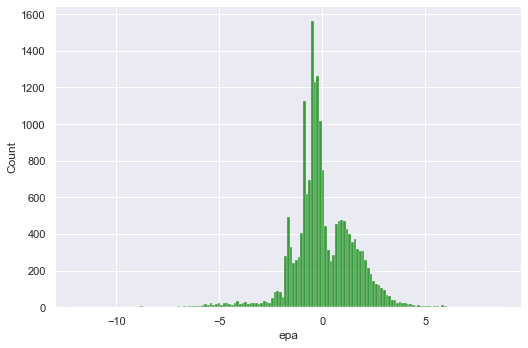

In [20]:

# data distribution plots below

sns.displot(df_combined['defendersInTheBox'], color='green', height=5, aspect=1.5)
plt.figure()
sns.displot(df_combined['offensePlayResult'], color='green', height=5, aspect=1.5)
plt.figure()
sns.displot(df_combined['playResult'], color='green', height=5, aspect=1.5)
plt.figure()
sns.displot(df_combined['epa'], color='green', height=5, aspect=1.5)

In [21]:

# create defenders in the box mean data frames 
mean_grouped_by_defendersInTheBox = pd.DataFrame(df_combined.groupby('defendersInTheBox', as_index=False).agg({'playResult':'mean'}))
# focus on < 4 and < 8
mean_grouped_by_defendersInTheBox = pd.DataFrame(df_combined[(df_combined['defendersInTheBox'] >= 4) & (df_combined['defendersInTheBox'] <= 8)])
print('cols', list(mean_grouped_by_defendersInTheBox.columns))

# create epa mean data frames 
epa_mean_grouped_by_defendersInTheBox = pd.DataFrame(df_combined.groupby('defendersInTheBox', as_index=False).agg({'epa':'mean'}))
# focus on < 4 and < 8
df_combined = pd.DataFrame(epa_mean_grouped_by_defendersInTheBox[(df_combined['defendersInTheBox'] >= 4) & (df_combined['defendersInTheBox'] <= 8)])
print('cols', list(epa_mean_grouped_by_defendersInTheBox.columns))


cols ['defendersInTheBox', 'offensePlayResult', 'playResult', 'epa']
cols ['defendersInTheBox', 'epa']


<ipython-input-21-860f2f3fdac9>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_combined = pd.DataFrame(epa_mean_grouped_by_defendersInTheBox[(df_combined['defendersInTheBox'] >= 4) & (df_combined['defendersInTheBox'] <= 8)])


<Figure size 864x864 with 0 Axes>

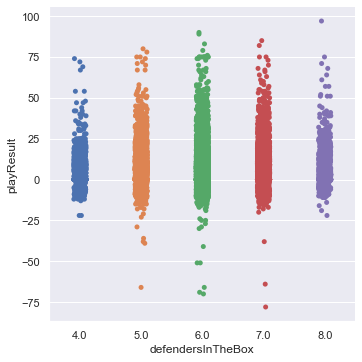

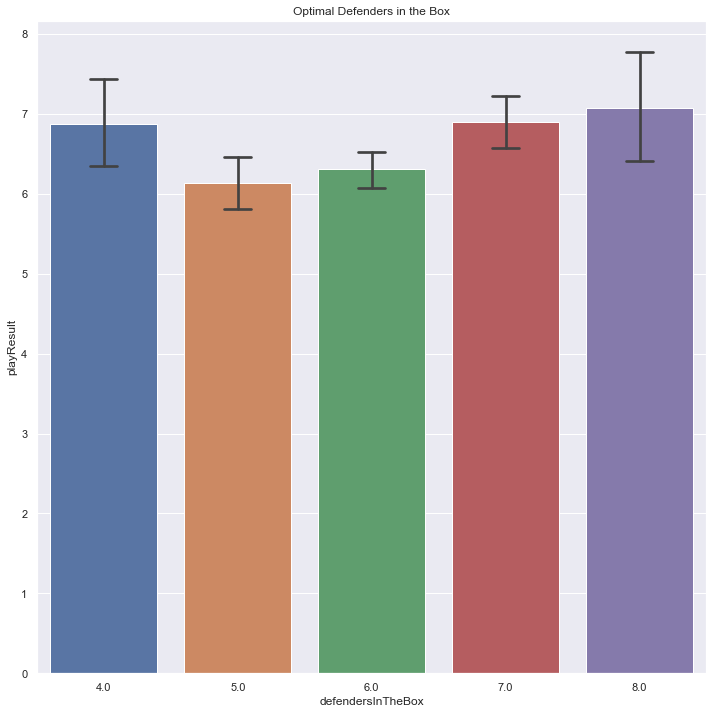

<Figure size 864x864 with 0 Axes>

In [28]:
sns.set(rc = {'figure.figsize':(12,12)})

sns.catplot(x='defendersInTheBox', y='playResult', data=mean_grouped_by_defendersInTheBox)
plt.figure()

# pallete = ‘seagreen’ --- Seaborn color map
# focus on 4 - 8

sns.barplot(x='defendersInTheBox', y='playResult', data=mean_grouped_by_defendersInTheBox, capsize=.2).set_title('Optimal Defenders in the Box')
plt.figure()

<Figure size 864x864 with 0 Axes>

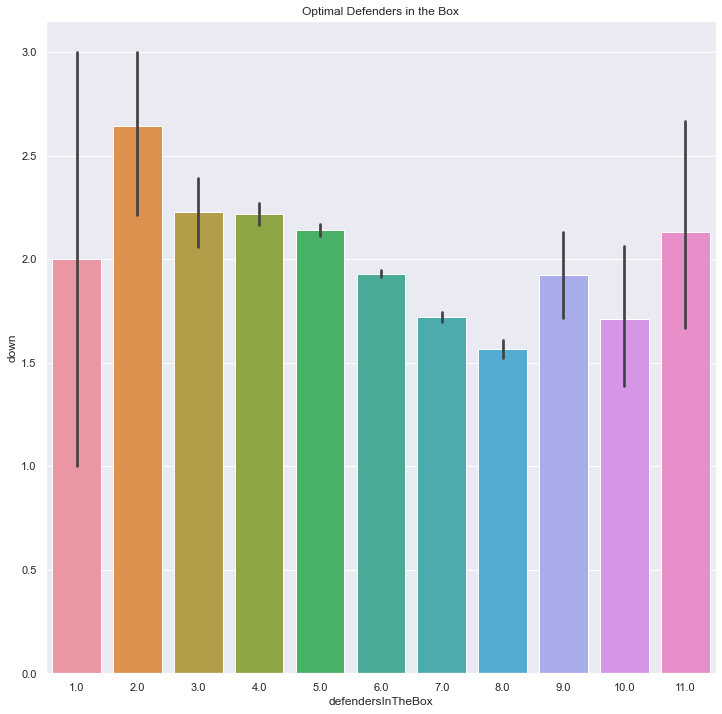

<Figure size 864x864 with 0 Axes>

In [23]:
# all defender counts charted
sns.barplot(x='defendersInTheBox', y='down', data=df_plays_full).set_title('Optimal Defenders in the Box')
plt.figure()

<AxesSubplot:xlabel='defendersInTheBox', ylabel='epa'>

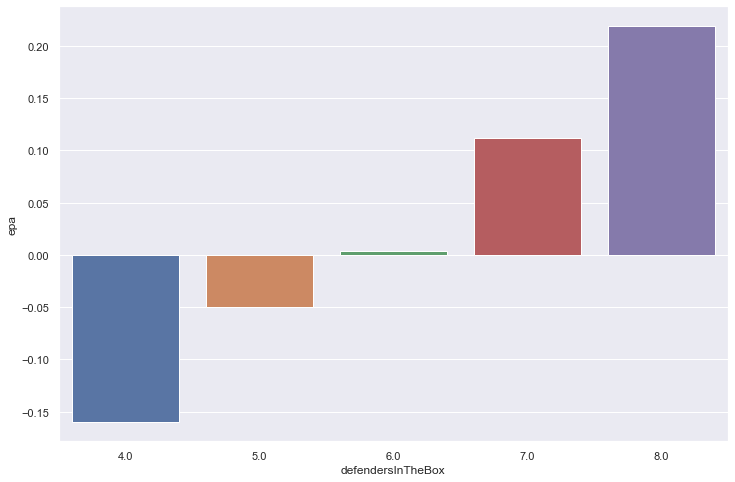

In [24]:
# ave eps charted 
sns.set(rc = {'figure.figsize':(12,8)})
sns.barplot(x='defendersInTheBox', y='epa', data=epa_mean_grouped_by_defendersInTheBox)